In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [5]:
def asympRead(particle, cutoff, cfgname, prefix): 
    return pd.concat([pd.read_csv("output/{}.{}/{}/asymp-{:g}.dat".format(prefix, cfgname, particle, cutscale), header=None, names=["E", str(cutscale)], index_col=0)\
                      for cutscale in cutoff], axis=1)\
          ,pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, particle), header=None, names=["cutscale", "E"], index_col=0)

In [6]:
def plotParticle(ax, pname, cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    data, peaks = asympRead(pname, config[pname]["cutscales"], cfgname, prefix)
    plotData = data.loc[(data.index > -np.inf) & (data.index < np.inf)].plot(marker="o", ls="", logy=True, ax=ax, title=pname+"("+"{:.5f}".format(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])+")")
    for line in ax.get_lines():
        color = line._get_markerfacecolor()
        pos = line.get_label()
        plotData.axvline(peaks.loc[float(pos)][0], ls="--", color=color)

In [7]:
def doPlots(cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    fig, axes = plt.subplots(len(config), figsize=(plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1]*len(config)))
    for i,pname in enumerate(config.keys()):
        plotParticle(axes[i], pname, cfgname, prefix)

In [8]:
def printCheck(cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        print("{}({})".format(pname,peaks.iloc[-1][0]))
        print("peaks - peaks[-1]")
        print(peaks - peaks.iloc[-1])
        print("\n")
        print("peaks[i]-peaks[i-1]")
        print(peaks.diff())
        print("\n---\n")

In [9]:
def readMine(cfgname, prefix):
    config = json.load(open(cfgname+".cfg"))
    my = dict()
    for pname in config.keys():
        peaks = pd.read_csv("output/{}.{}/{}/minE.dat".format(prefix, cfgname, pname), header=None, names=["cutscale", "E"], index_col=0)
        my.update({pname: np.array([1000*(2*config[pname]["eq"]["env"]["mC"]+peaks.iloc[-1][0])])})
    my = pd.DataFrame.from_dict(my, orient="index")
    my.columns = ["my("+prefix+")"]
    return my

# Charmonium

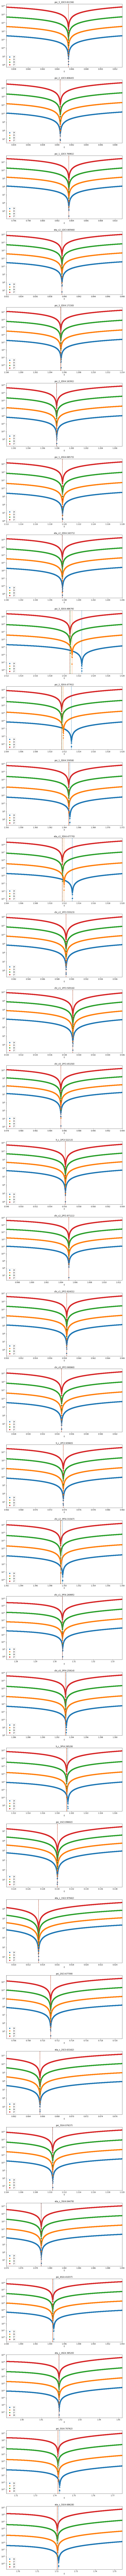

In [10]:
doPlots("particles-c-lin", "lin")

In [11]:
printCheck("particles-c-lin", "lin")

psi_3_1D(0.8455568033419498)
peaks - peaks[-1]
                     E
cutscale              
14        8.905307e-08
15        6.083400e-09
16        3.613602e-10
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -8.296967e-08
16       -5.722040e-09
17       -3.613602e-10

---

psi_2_1D(0.84042535167933)
peaks - peaks[-1]
                     E
cutscale              
14        7.098913e-08
15        4.231920e-09
16        2.384100e-10
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -6.675721e-08
16       -3.993510e-09
17       -2.384100e-10

---

psi_1_1D(0.80360831535235)
peaks - peaks[-1]
                     E
cutscale              
14        2.204999e-08
15        2.022830e-09
16        8.568002e-11
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.002716e-08
16 

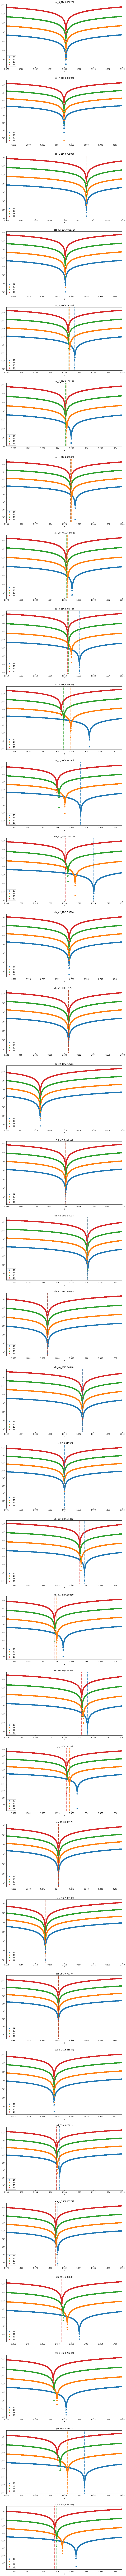

In [12]:
doPlots("particles-c-scr", "scr")

In [13]:
printCheck("particles-c-scr", "scr")

psi_3_1D(0.9862017131485)
peaks - peaks[-1]
                     E
cutscale              
14        3.048357e-06
15        4.693829e-07
16        6.015227e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.578974e-06
16       -4.092306e-07
17       -6.015227e-08

---

psi_2_1D(0.9849396262019899)
peaks - peaks[-1]
                     E
cutscale              
14        2.581134e-06
15        3.962666e-07
16        5.055964e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -2.184868e-06
16       -3.457069e-07
17       -5.055964e-08

---

psi_1_1D(0.9730253253476701)
peaks - peaks[-1]
                     E
cutscale              
14        1.867722e-06
15        2.809269e-07
16        3.523659e-08
17        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
14                 NaN
15       -1.586795e-06
16

In [14]:
article = pd.read_csv("../data/charmonia.csv", index_col=0)
res = article.join(readMine("particles-c-lin", "lin")).join(readMine("particles-c-scr", "scr"))

In [15]:
compiled = res.join(\
    res["LP"].subtract(res["my(lin)"], axis=0).abs().rename("dev(lin)")\
).join(\
    res.subtract(res["my(lin)"], axis=0).abs().drop(["my(lin)"], axis=1).min(axis=1).rename("alldev(lin)")\
).join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3, "alldev(lin)": 3, "dev(lin)": 3})

compiled = compiled.join(\
    compiled["dev(lin)"].add(compiled["dev(scr)"]).rename("dev(tot)")\
)\
.join(\
    compiled["alldev(lin)"].add(compiled["alldev(scr)"]).rename("alldev(tot)")\
)\
.reindex_axis(["exp", "8", "11", "LP", "my(lin)", "dev(lin)", "alldev(lin)", "SP", "my(scr)", "dev(scr)", "alldev(scr)", "dev(tot)", "alldev(tot)"], axis=1)\

## description of columns
* my(lin), my(scr) - my results for linear and screened potential
* dev(lin), dev(scr) - deviation of my results from those represented in paper
* alldev(lin), alldev(scr) - minimum among deviations from: exp, 8, 11, LP(SP). columns shown in the article
* dev(tot) = dev(lin) + dev(scr)
* alldev(tot) = alldev(lin) + alldev(scr)

In [16]:
compiled.sort_values("alldev(tot)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_1S,3097.0,3090.0,3097,3097,3096.023860,0.976,0.148,3097,3096.172251,0.828,0.148,1.804,0.296
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526
h_c_3P,NaN,4279.0,4184,4285,4285.291267,0.291,0.291,4193,4193.280006,0.280,0.280,0.571,0.571
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759


In [17]:
compiled.sort_values("dev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
psi_2_2D,NaN,4158.0,4100,4165,4163.913738,1.086,1.086,4109,4109.113053,0.113,0.113,1.199,1.199
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526
h_c_3P,NaN,4279.0,4184,4285,4285.291267,0.291,0.291,4193,4193.280006,0.280,0.280,0.571,0.571


In [18]:
compiled.sort_values("alldev(scr)")

,exp,8,11,LP,my(lin),dev(lin),alldev(lin),SP,my(scr),dev(scr),alldev(scr),dev(tot),alldev(tot)
name,,,,,,,,,,,,,
h_c_2P,NaN,3934.0,3908,3940,3939.834604,0.165,0.165,3916,3915.963116,0.037,0.037,0.202,0.202
psi_2_1D,3823.0,3800.0,3798,3807,3806.425352,0.575,0.514,3807,3806.939626,0.060,0.060,0.635,0.574
eta_c2_1D,NaN,3799.0,3796,3806,3805.658373,0.342,0.342,3805,3805.109061,0.109,0.109,0.451,0.451
psi_2_2D,NaN,4158.0,4100,4165,4163.913738,1.086,1.086,4109,4109.113053,0.113,0.113,1.199,1.199
eta_c2_3D,NaN,NaN,4326,4478,4477.701360,0.299,0.299,4336,4336.134176,0.134,0.134,0.433,0.433
psi_1S,3097.0,3090.0,3097,3097,3096.023860,0.976,0.148,3097,3096.172251,0.828,0.148,1.804,0.296
h_c_1P,3525.0,3516.0,3519,3522,3522.131523,0.132,0.132,3526,3526.178089,0.178,0.178,0.310,0.310
psi_3_1D,NaN,3806.0,3799,3811,3811.556803,0.557,0.557,3808,3808.201713,0.202,0.202,0.759,0.759
eta_c2_2D,NaN,4158.0,4099,4164,4163.707662,0.292,0.292,4108,4108.233653,0.234,0.234,0.526,0.526


# Bottomonium

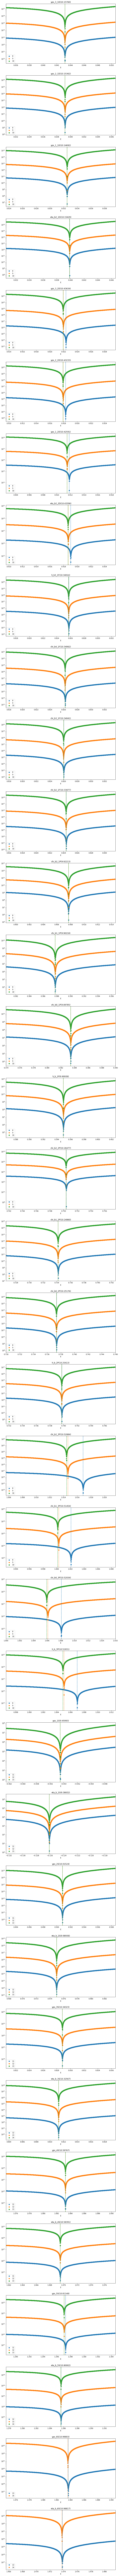

In [19]:
doPlots("particles-b-scr", "scr")

In [20]:
printCheck("particles-b-scr", "scr")

yps_3_1D(0.6432027032383699)
peaks - peaks[-1]
                     E
cutscale              
8         1.758432e-06
9         4.396355e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.714468e-06
10       -4.396355e-08

---

yps_2_1D(0.63921668198369)
peaks - peaks[-1]
                     E
cutscale              
8         1.543114e-06
9         3.839471e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.504719e-06
10       -3.839471e-08

---

yps_1_1D(0.63251934345104)
peaks - peaks[-1]
                     E
cutscale              
8         1.303216e-06
9         3.196858e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.271248e-06
10       -3.196858e-08

---

eta_b2_1D(0.63988873510612)
peaks - peaks[-1]
                     E
cutscale            

                     E
cutscale              
11                 NaN
12       -2.766132e-06
13       -7.809230e-08

---

eta_b_4S(1.0695148978031999)
peaks - peaks[-1]
                     E
cutscale              
11        1.117822e-06
12        5.542860e-08
13        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
11                 NaN
12       -1.062393e-06
13       -5.542860e-08

---

yps_5S(1.2970778786963)
peaks - peaks[-1]
                 E
cutscale          
11        0.000225
12        0.000014
13        0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
11             NaN
12       -0.000211
13       -0.000014

---

eta_b_5S(1.2856221121259999)
peaks - peaks[-1]
                     E
cutscale              
12        1.109100e-05
13        4.539541e-07
14        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
12                 NaN
13       -1.063704e-05
14       -4.539541e-07

---

yps_6S(1.

In [21]:
article = pd.read_csv("../data/bottomonia.csv", index_col=0)
res = article.join(readMine("particles-b-scr", "scr"))

In [22]:
compiled = res.join(\
    res["SP"].subtract(res["my(scr)"], axis=0).abs().rename("dev(scr)")\
).join(\
    res.subtract(res["my(scr)"], axis=0).abs().drop(["my(scr)"], axis=1).min(axis=1).rename("alldev(scr)")\
)\
.round({"dev(scr)": 3, "alldev(scr)": 3})\
.reindex_axis(["PDG", "SNR", "GI", "NR", "SP", "my(scr)", "dev(scr)", "alldev(scr)"], axis=1)\

## description of columns
* my(scr) - my results for screened potential
* dev(scr) - deviation of my results from those represented in paper
* alldev(scr) - minimum among deviations from: PDG, SNR, GI, NR, SP; columns shown in the article

In [23]:
compiled.sort_values("dev(scr)")

,PDG,SNR,GI,NR,SP,my(scr),dev(scr),alldev(scr)
name,,,,,,,,
eta_b_5S,NaN,10817.0,10869,NaN,10800,10800.022112,0.022,0.022
yps_1S,9460.0,9460.0,9465,9502.0,9460,9459.925643,0.074,0.074
eta_b_4S,NaN,10595.0,10623,NaN,10584,10583.914898,0.085,0.085
h_b_2P,10260.0,10256.0,10250,10240.0,10254,10254.133636,0.134,0.134
eta_b_6S,NaN,11011.0,11097,NaN,10988,10988.172491,0.172,0.172
yps_3S,10355.0,10351.0,10354,10349.0,10343,10343.231197,0.231,0.231
yps_2S,10023.0,10016.0,10003,10015.0,10015,10015.242829,0.243,0.243
h_b_3P,NaN,10529.0,10541,10516.0,10519,10519.305110,0.305,0.305
yps_2_2D,NaN,10438.0,10449,10418.0,10432,10432.326380,0.326,0.326


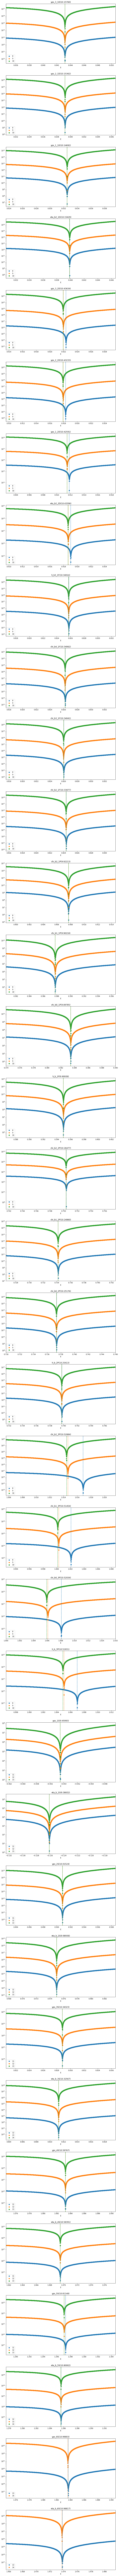

In [24]:
doPlots("particles-b-scr", "scr")

In [25]:
printCheck("particles-b-scr", "scr")

yps_3_1D(0.6432027032383699)
peaks - peaks[-1]
                     E
cutscale              
8         1.758432e-06
9         4.396355e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.714468e-06
10       -4.396355e-08

---

yps_2_1D(0.63921668198369)
peaks - peaks[-1]
                     E
cutscale              
8         1.543114e-06
9         3.839471e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.504719e-06
10       -3.839471e-08

---

yps_1_1D(0.63251934345104)
peaks - peaks[-1]
                     E
cutscale              
8         1.303216e-06
9         3.196858e-08
10        0.000000e+00


peaks[i]-peaks[i-1]
                     E
cutscale              
8                  NaN
9        -1.271248e-06
10       -3.196858e-08

---

eta_b2_1D(0.63988873510612)
peaks - peaks[-1]
                     E
cutscale            

                 E
cutscale          
13             NaN
14       -0.000053

---

eta_b_6S(1.4737724907713001)
peaks - peaks[-1]
                 E
cutscale          
13        0.000042
14        0.000000


peaks[i]-peaks[i-1]
                 E
cutscale          
13             NaN
14       -0.000042

---

